In [ ]:
#Descriptioon : This is a sentimental analysis program using python.


In [ ]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the data
consumerKey=""
consumerSecret=""
accessToken=""
accessTokenSecret=""


In [ ]:
#create the authentication object
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)

#Set the acces token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)

#create the API object while passing in the  auth info
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
#Extract 100 tweets from the twitter user
posts=api.user_timeline(screen_name="BillGates", count=100, lang='en', tweet_mode="extended")

#print the last five tweets from the account
print("Show the 5 recent twwts: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i=i+1

Show the 5 recent twwts: 

1) RT @BarackObama: Not many of us get to live to see our own legacy play out in such a meaningful, remarkable way. John Lewis did:

https://t…

2) This is a great loss for America, and for everyone who believes in making the world a more just place. John Lewis not only saw that our country could be better--he never stopped working to make it that way. We need leaders like him more than ever. https://t.co/YffaikZtZZ

3) RT @melindagates: Decision-makers can take steps right now to make sure the world recovers from this pandemic stronger, more prepared &amp; mor…

4) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year. @BernardOlayo founded @Hewa_Tele to address this often-overlooked challenge. https://t.co/TSea0oyDjP

5) This hero is playing a critical role in Kenya’s preparations to tackle COVID-19 by scaling up medical oxygen supplies that will be needed to keep the mos

In [ ]:
#create a data frame with a coulmn called Tweets
df =pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 5 rows of data
df.head()

,Tweets
0,Oofé☹️☹️.\n#Sundaetweet\n#04 https://t.co/OBoP...
1,Dooriyaan [Love Aaj Kal (2009)]&gt;&gt;&gt;&gt...
2,"We all are so similar to Rapunzel, the only di..."
3,"People with status:\n""If you could read my min..."
4,@ChampionsLeague Reus


In [ ]:
#cleaning the text
def clean(text):
  text=re.sub(r'@[A-Za-z0-9]+', '', text) # Removes @mentions
  text=re.sub(r'#','',text)#Remove the hashtags
  text=re.sub(r'RT[\s]+','',text)#remove RT
  text=re.sub(r'https?:\/\/\S+','',text) #remove hyperlinks
  return text
#cleaning the text
df['Tweets']=df['Tweets'].apply(clean)

#show the cleaned text
df

,Tweets
0,Oofé☹️☹️.\nSundaetweet\n04
1,Dooriyaan [Love Aaj Kal (2009)]&gt;&gt;&gt;&gt...
2,"We all are so similar to Rapunzel, the only di..."
3,"People with status:\n""If you could read my min..."
4,Reus
5,: Kaise ho maulana \n😂😂😂
6,: People debating zone classifications should ...
7,"The line ""That is a wrap"" hurts a lot."
8,"Verily We belong to god, and verily to him do ..."
9,: Earlier this week: Eredivisie 2019/20 season...


In [ ]:
#create a function to get the subjectivity
def getsub(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getpol(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity']=df['Tweets'].apply(getsub)
df['Polarity']=df['Tweets'].apply(getpol)

#cshow the new data frames with the new columns
df

,Tweets,Subjectivity,Polarity
0,Oofé☹️☹️.\nSundaetweet\n04,0.000000,0.000000
1,Dooriyaan [Love Aaj Kal (2009)]&gt;&gt;&gt;&gt...,0.600000,0.500000
2,"We all are so similar to Rapunzel, the only di...",0.616667,0.066667
3,"People with status:\n""If you could read my min...",0.000000,0.000000
4,Reus,0.000000,0.000000
5,: Kaise ho maulana \n😂😂😂,0.000000,0.000000
6,: People debating zone classifications should ...,0.541667,-0.291667
7,"The line ""That is a wrap"" hurts a lot.",0.000000,0.000000
8,"Verily We belong to god, and verily to him do ...",0.000000,0.000000
9,: Earlier this week: Eredivisie 2019/20 season...,0.500000,0.000000


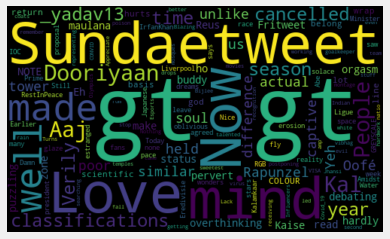

In [ ]:
#Plot word cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute negative, neutral and positive analysis
def getanly(score):
  if score<0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getanly)
#show the data frame
df

,Tweets,Subjectivity,Polarity,Analysis
0,No viscosity is so powerful to restrain water ...,1.000000,0.300000,Positive
1,Enlightenment is getting in touch with the bud...,0.000000,0.000000,Neutral
2,"""PERVY MINDS""👐👀",0.000000,0.000000,Neutral
3,"Empathy is the janitor of soul, if one sees n...",0.731250,-0.006250,Negative
4,"""The one lies here always tried to bring back ...",0.000000,0.000000,Neutral
5,Glass always thought it was its fault to be br...,0.500000,-0.218750,Negative
6,At a glance.photography photooftheday PictureP...,0.000000,0.000000,Neutral
7,"Some people in our life are rebound cases , bu...",0.000000,0.000000,Neutral
8,"Stephen Hawking and his wife Jane Wilde, 1965....",0.000000,0.000000,Neutral
9,"When you feel useless, abandoned or of no wort...",0.359722,-0.088889,Negative


In [ ]:
#show all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(i)+ ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

0) No viscosity is so powerful to restrain water at its utmost flow, that goes with your determination too.✔

12) Neither lurid , nor too dull
the perfect combination lies between it. So do the people, the search of perfection engenders chaos in our mind which is futile. They who desires perfection ,looses the satisfaction and frets lifelong.🧘‍♀️
LifeLessons PositiveVibes selfsatisfaction

13)  You right now 🦋

14) It was never you and me fighting, deciding or deciphering,  it was all preplanned and the artist is just making an outline on the sketch to ensure that it looks as it has to be. You and me are the characters as described in one of my favorite lines of Shakespeare's THE SEVEN AGES 

15) Now our true patriotism is tested , more than the nation its our people, family , humanity and whole mankind which needs to be saved not by fighting but but by "not fighting" and staying home.🌏🙏 

20) If you fall for someone they will keep on digging more for you, don't fall just wait for the 

In [ ]:
#show the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(i)+ ') '+sortedDF['Tweets'][i])
    print()
    j=j+1


3) Empathy is the janitor of soul, if one  sees nothing amid evil and despair , keep it for each other and your paths will be in rose beacons.

twitter india myfeellings life empathy peace love hope

5) Glass always thought it was its fault to be brittle,💎
Little did it know that the world was no more of fragiles.🌷
twitter India BeStrong InstantInfluencer

9) When you feel useless, abandoned or of no worth - keep telling yourself their is a warrior inside you who disrupted you from becoming an evildoer.
And when you gain the arrogance of your attainment- tell yourself that all the kings who once ruled the world turned down to ashes.🪔

11) The trimph of truth is so loud and suffice that it reverberates every vile and sinful corner at once. It may come late but it cannot be suppressed.🗽

16) "I will destroy you and leave you alone after i become everything to you ." - said my ego.👀🦋

18) There's a whole new world to create and rule , when you come out of that stupid "i can't" dumbshell ,

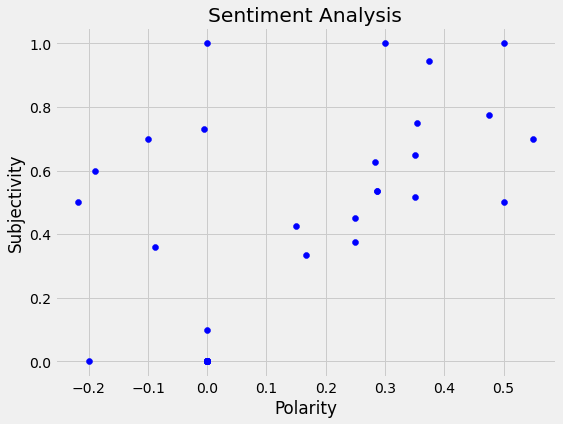

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100, 1)

39.0

In [ ]:
#get the percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100, 1)

14.6

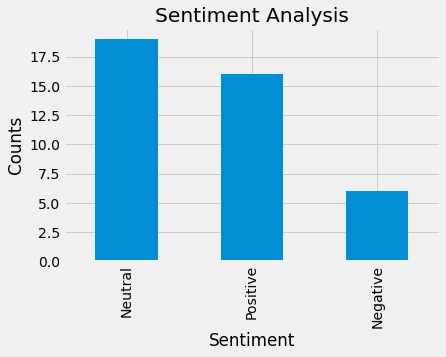

In [ ]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()